This project focuses on creating a predictive model to forecast future air passenger traffic based on historical time series data. The dataset spans from January 1949 to December 1960, containing monthly passenger totals for a particular airline. The project will include time series analysis, data preprocessing, visualization, and the development of predictive models using both statistical methods and machine learning algorithms.

Project Goals:
Analyze and interpret the trends, seasonality, and patterns present in the historical data.
Build and assess forecasting models using statistical approaches such as ARIMA (AutoRegressive Integrated Moving Average) and machine learning models like LSTM (Long Short-Term Memory) to predict air passenger numbers.
Evaluate and compare model performances to identify the most accurate model for final forecasting.

In [2]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

In [3]:


# Load the dataset and rename columns for easier access
air_passengers_data = pd.read_csv("AirPassengers.csv")
air_passengers_data.columns = ['Date', 'Passengers']



In [11]:
# Preview the data
air_passengers_data.head()

,Date,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


### Visualizing time series data

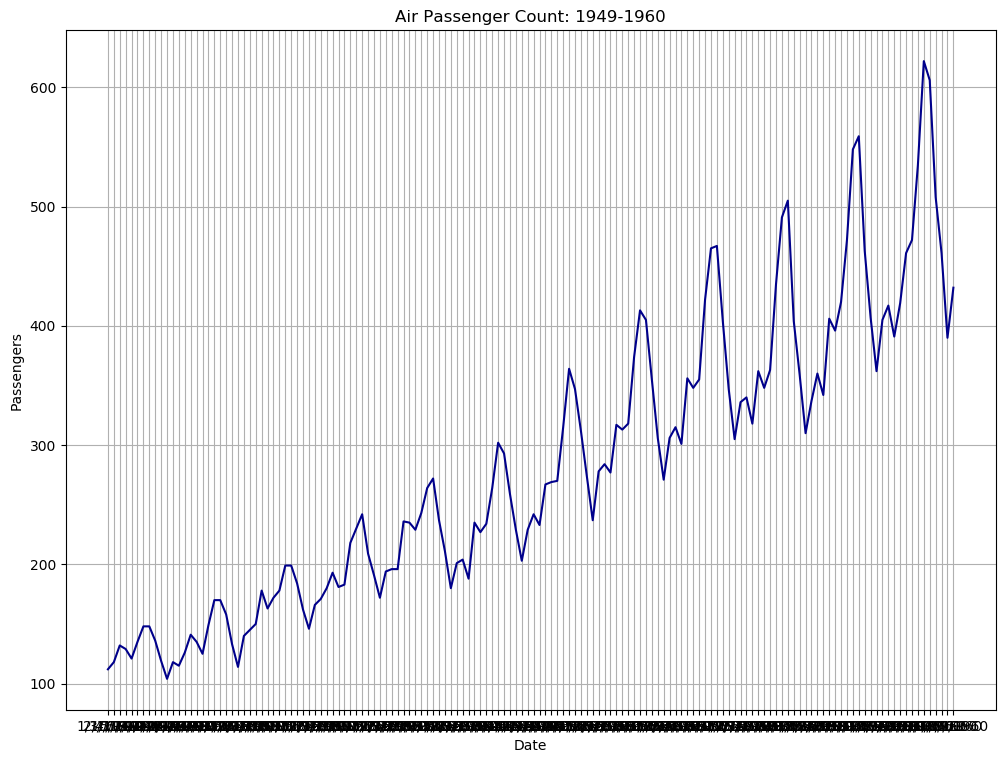

In [4]:


# Define function for plotting time series data
def display_time_series(df, x_col, y_col, plot_title="", x_label='Date', y_label='Passengers', dpi_value=100):
    plt.figure(figsize=(12, 9), dpi=dpi_value)
    plt.plot(x_col, y_col, color='darkblue')
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

# Plot the number of passengers over time
display_time_series(air_passengers_data, air_passengers_data['Date'], air_passengers_data['Passengers'], "Air Passenger Count: 1949-1960")



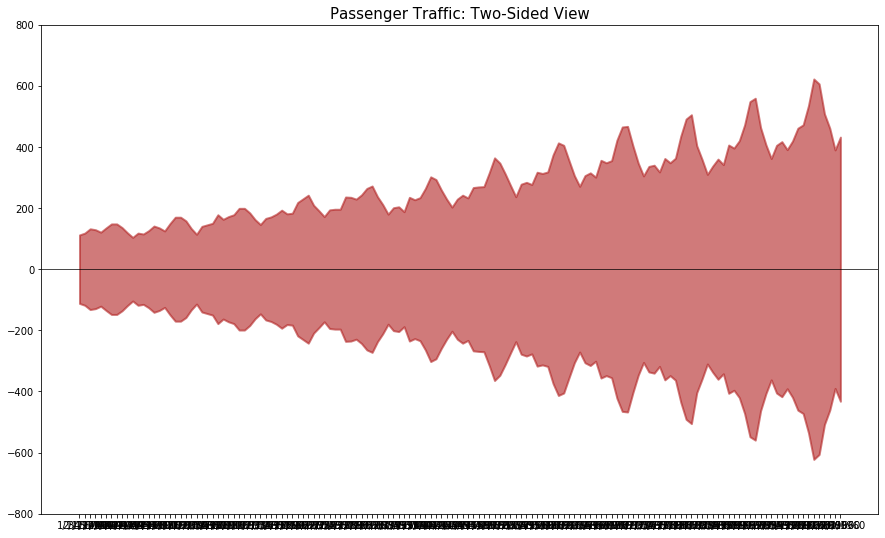

In [5]:
# Extract date and passenger values
date_values = air_passengers_data['Date'].values
passenger_counts = air_passengers_data['Passengers'].values

# Plot a filled area chart to visualize trends
plt.figure(figsize=(15, 9), dpi=72)
plt.fill_between(date_values, y1=passenger_counts, y2=-passenger_counts, color='firebrick', alpha=0.6, linewidth=2)
plt.ylim(-800, 800)
plt.title("Passenger Traffic: Two-Sided View", fontsize=15)
plt.axhline(0, color='black', linewidth=0.7)
plt.show()



A time series visualization typically comprises the following components: Base Level, Trend, Seasonality, and Error.

Trend: A consistent upward or downward movement in the data over time.

Seasonality: A clearly defined and recurring pattern that occurs at regular intervals, often driven by cyclical or periodic factors.

Cyclic Behavior
Cyclic patterns occur when the fluctuations in a time series are not aligned with specific calendar intervals. These variations are often influenced by socio-economic factors.

Additive vs. Multiplicative Time Series
Additive Time Series:
The value is represented as:
Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
The value is expressed as:
Value = Base Level × Trend × Seasonality × Error

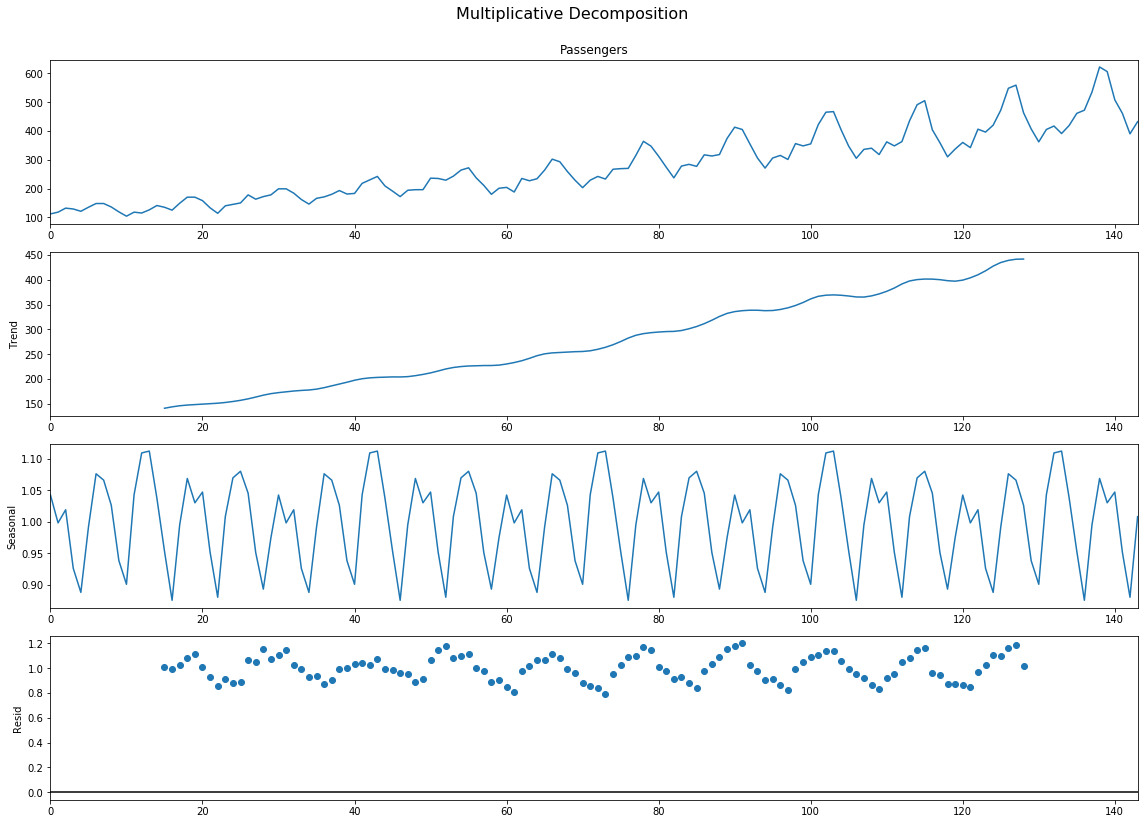

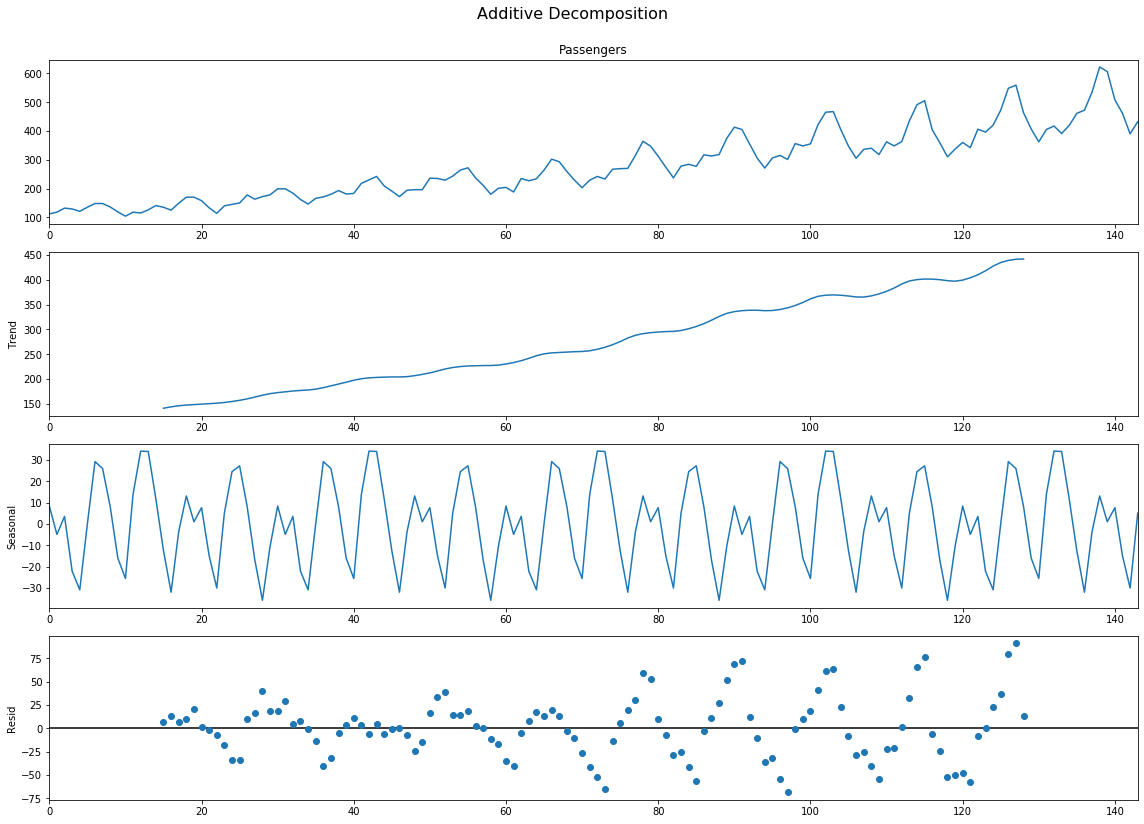

In [6]:
# Observations on Time Series Patterns
"""
Time series data can be represented as the sum of the following components:
1. Base Level
2. Trend
3. Seasonality
4. Error
"""

# Time Series Decomposition (Multiplicative & Additive Models)
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform multiplicative decomposition
multiplicative_model = seasonal_decompose(air_passengers_data['Passengers'], model='multiplicative', period=30)

# Perform additive decomposition
additive_model = seasonal_decompose(air_passengers_data['Passengers'], model='additive', period=30)

# Visualize decomposition results
plt.rcParams.update({'figure.figsize': (16, 12)})
multiplicative_model.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
additive_model.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In an additive model, the residuals or errors may show noticeable patterns. However, in a multiplicative model, the residuals appear more random, which is preferable. Therefore, for this particular series, we will opt for multiplicative decomposition.

Stationarity in Time Series
A stationary time series exhibits consistent behavior over time, making it likely to maintain similar patterns in the future. A time series is considered stationary when it meets the following criteria:

Constant mean
Constant variance
Autocovariance that is independent of time
When these three conditions are satisfied, time series analysis techniques can be applied effectively.

In [13]:
# Augmented Dickey-Fuller Test for Stationarity
from statsmodels.tsa.stattools import adfuller

print("Performing Augmented Dickey-Fuller Test: ")
adf_test_result = adfuller(air_passengers_data['Passengers'], autolag='AIC')
test_output = pd.Series(adf_test_result[:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Observations Used'])

for key, value in adf_test_result[4].items():
    test_output[f'Critical Value ({key})'] = value

print(test_output)





Performing Augmented Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
Observations Used       130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


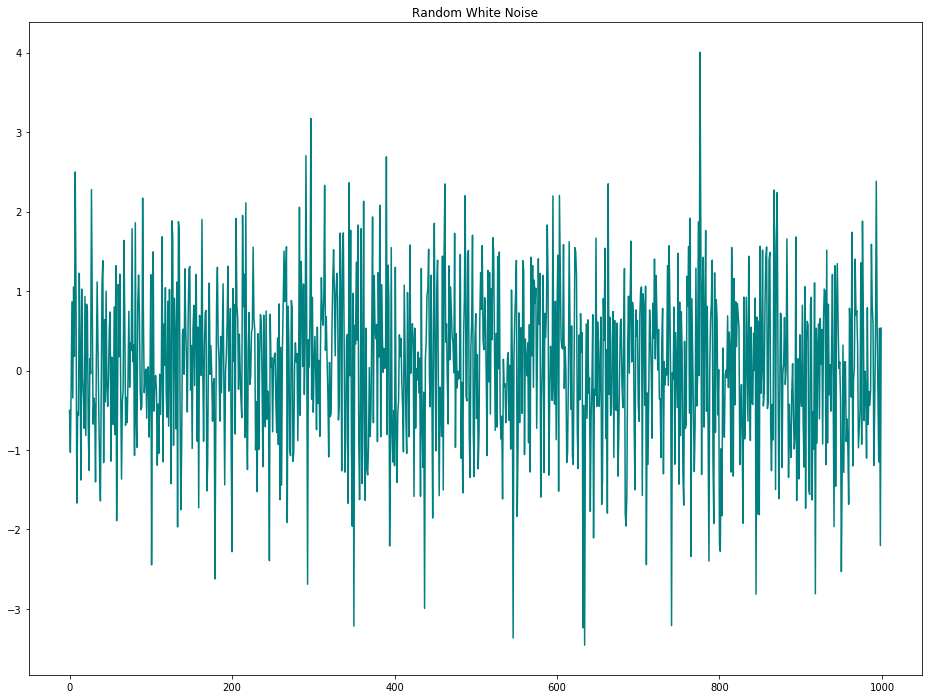

In [12]:
# Generate white noise and plot it
random_noise = np.random.randn(1000)
pd.Series(random_noise).plot(title="Random White Noise", color='teal')
plt.show()

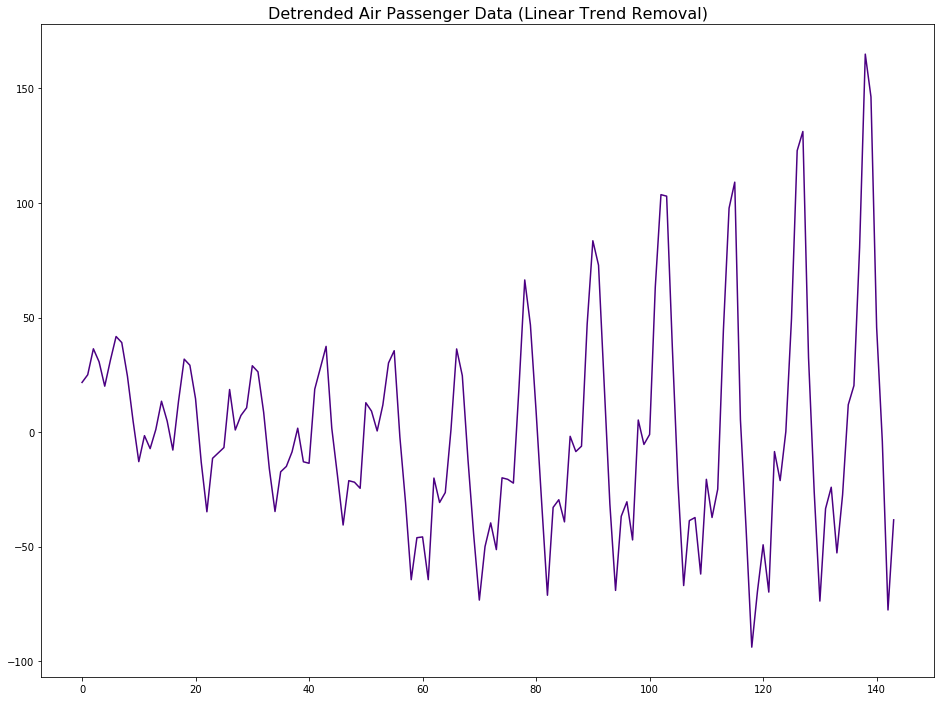

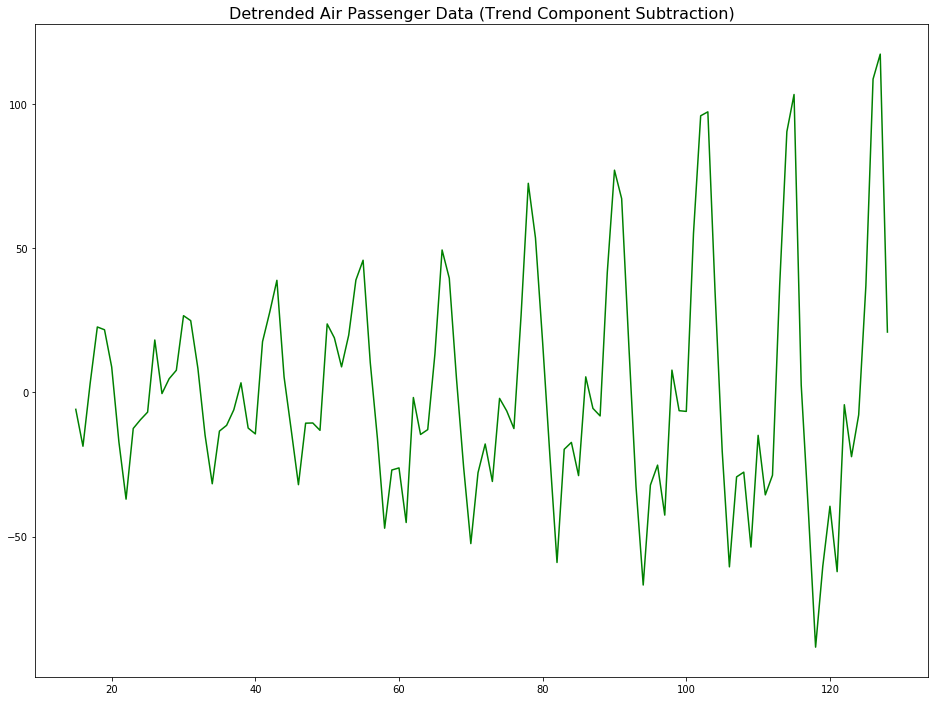

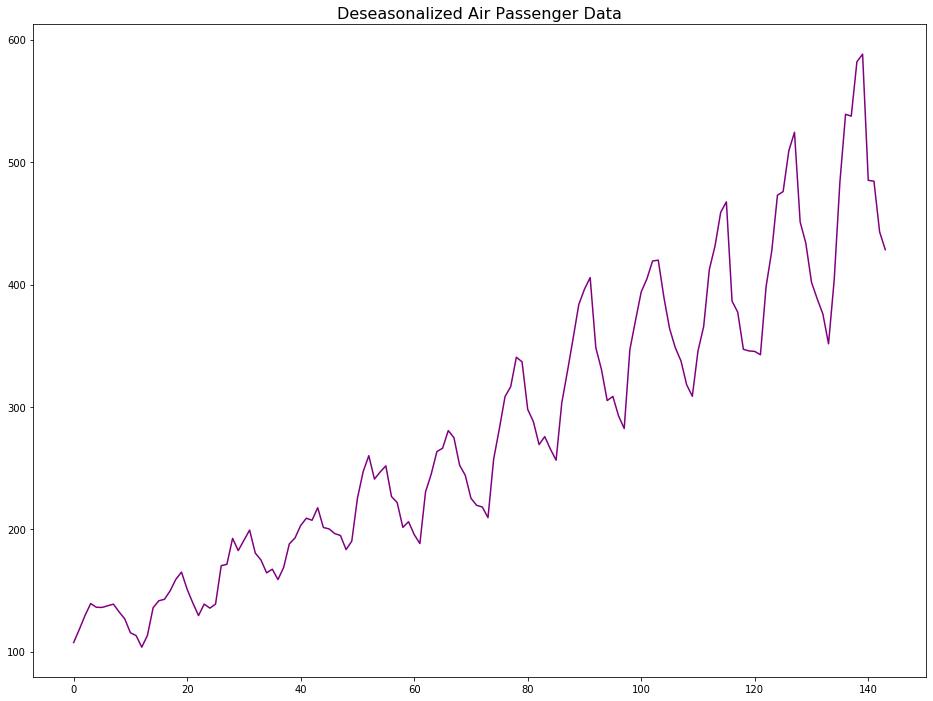

In [8]:
# Detrending Time Series Using Linear Detrending
from scipy import signal

# Remove linear trend
detrended_data = signal.detrend(air_passengers_data['Passengers'].values)
plt.plot(detrended_data, color='indigo')
plt.title("Detrended Air Passenger Data (Linear Trend Removal)", fontsize=16)
plt.show()

# Detrending Using Time Series Decomposition
detrended_series = air_passengers_data['Passengers'].values - multiplicative_model.trend
plt.plot(detrended_series, color='green')
plt.title("Detrended Air Passenger Data (Trend Component Subtraction)", fontsize=16)
plt.show()

# Deseasonalize Time Series by Division of Seasonal Component
deseasonalized_series = air_passengers_data['Passengers'].values / multiplicative_model.seasonal
plt.plot(deseasonalized_series, color='purple')
plt.title("Deseasonalized Air Passenger Data", fontsize=16)
plt.show()



c:\Users\achal\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


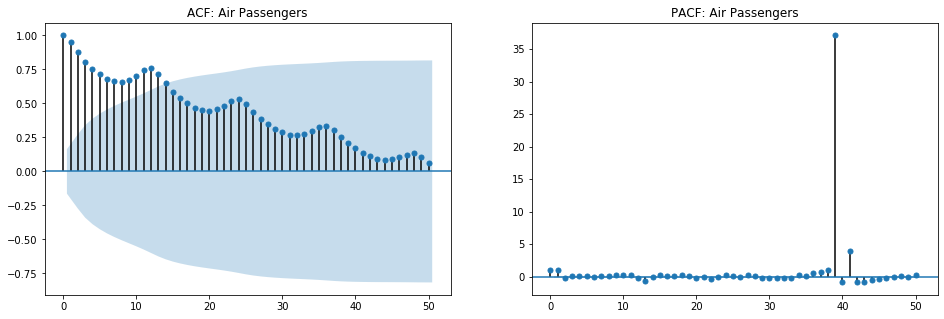

In [16]:
# Autocorrelation and Partial Autocorrelation Functions
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
plot_acf(air_passengers_data['Passengers'].tolist(), lags=50, ax=axes[0], title='ACF: Air Passengers')
plot_pacf(air_passengers_data['Passengers'].tolist(), lags=50, ax=axes[1], title='PACF: Air Passengers')
plt.show()



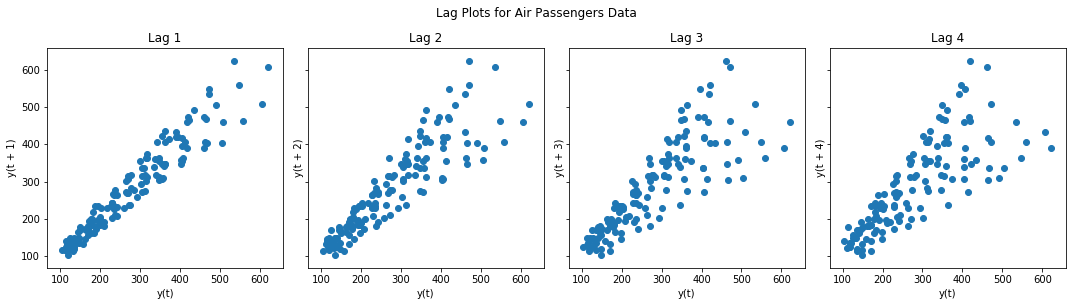

In [10]:
# Lag Plots to Check for Autocorrelation
from pandas.plotting import lag_plot

# Plot Lag Plots for 1 to 4 lags
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharex=True, sharey=True)
for i in range(4):
    lag_plot(air_passengers_data['Passengers'], lag=i+1, ax=axes[i])
    axes[i].set_title(f'Lag {i+1}')
plt.suptitle('Lag Plots for Air Passengers Data', y=1.05)
plt.tight_layout()
plt.show()
